In [26]:
import os
import pandas as pd

In [27]:
excel_names=[]
for excel_name in os.listdir("./data"):
    excel_names.append(excel_name)

# excel_names

### loop to read data

In [28]:
df_list=[]

for excel_name in excel_names:
    filename="./data/{}".format(excel_name)
    df=pd.read_csv(filename,sep=",")
    df_list.append(df)
df_merge=pd.concat(df_list)
df_merge.describe()
# df_merge.head(10)

,买家数,成交金额,搜索人数,客单价,UV价值
count,7.850000e+03,7.850000e+03,7.850000e+03,7850.000000,7850.000000
mean,3.392833e+05,1.185596e+07,6.887382e+05,350.829666,33.409064
std,2.146265e+06,4.018051e+07,3.271004e+06,1733.578405,110.888667
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.229250e+03,1.114842e+05,9.127000e+03,51.520000,10.330000
50%,6.180000e+03,8.422605e+05,4.307200e+04,108.990000,19.940000
75%,4.429350e+04,5.753788e+06,2.907342e+05,273.765000,35.500000
max,2.752450e+07,5.032054e+08,8.213897e+07,86194.000000,7590.750000


In [29]:
new_date=df_merge['日期'].str.split("|", n = 1, expand = True) 
df_merge['开始日期']=new_date[0]
df_merge['结束日期']=new_date[1]
df_merge['开始日期']=pd.to_datetime(df_merge['开始日期'].astype(str),format='%Y-%m-%d')
df_merge['结束日期']=pd.to_datetime(df_merge['结束日期'].astype(str),format='%Y-%m-%d')
# df_merge.head(10)
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7850 entries, 0 to 233
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   日期      7850 non-null   object        
 1   类目名称    7850 non-null   object        
 2   买家数     7850 non-null   int64         
 3   成交金额    7850 non-null   int64         
 4   搜索人数    7850 non-null   int64         
 5   成交金额占比  7850 non-null   object        
 6   成交金额同比  7850 non-null   object        
 7   成交人数占比  7850 non-null   object        
 8   成交人数同比  7850 non-null   object        
 9   客单价     7850 non-null   float64       
 10  UV价值    7850 non-null   float64       
 11  开始日期    7850 non-null   datetime64[ns]
 12  结束日期    7850 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(3), object(6)
memory usage: 858.6+ KB


In [30]:
# df_merge["成交金额占比"].str.contains("-").count()
# df_merge["成交金额占比"]=df_merge["成交金额占比"].str.replace("-","0")
# df_merge[df_merge["成交金额占比"]=="-"]["成交金额占比"].value_counts()
# df_merge[df_merge["成交金额同比"]=="-"]["成交金额同比"].value_counts()
# df_merge[df_merge["成交人数占比"]=="-"]["成交人数占比"].value_counts()
# df_merge[df_merge["成交人数同比"]=="-"]["成交人数同比"].value_counts()
# df_merge[df_merge["成交金额占比"]=="-"].value_counts()
# df_flate=df_merge[df_merge["成交金额占比"].str.contains("-")]
# df_flate.head(10)
# column_list=['成交金额占比']
column_list=['成交金额占比','成交金额同比','成交人数占比','成交人数同比']

for column in column_list:
    df_merge[column]=df_merge[column].replace("-","0") 
    df_merge[column]=df_merge[column].str.replace("%","") 
    df_merge[column]=df_merge[column].astype("float64")


# df_merge["成交金额占比"]=df_merge["成交金额占比"].replace("-","0") 
# # df_merge[df_merge["成交金额占比"]=="0"]["成交金额占比"].value_counts()

# df_merge["成交金额占比"]=df_merge["成交金额占比"].str.replace("%","") 
# df_merge["成交金额占比"]=df_merge["成交金额占比"].astype("float64")
# df_merge.head(10)
df_merge.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 7850 entries, 0 to 233
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   日期      7850 non-null   object        
 1   类目名称    7850 non-null   object        
 2   买家数     7850 non-null   int64         
 3   成交金额    7850 non-null   int64         
 4   搜索人数    7850 non-null   int64         
 5   成交金额占比  7850 non-null   float64       
 6   成交金额同比  7850 non-null   float64       
 7   成交人数占比  7850 non-null   float64       
 8   成交人数同比  7850 non-null   float64       
 9   客单价     7850 non-null   float64       
 10  UV价值    7850 non-null   float64       
 11  开始日期    7850 non-null   datetime64[ns]
 12  结束日期    7850 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(6), int64(3), object(2)
memory usage: 858.6+ KB


In [31]:
# df_merge[df_merge["成交金额占比"]==0]["成交金额占比"].value_counts()

In [32]:
df_merge.类目名称.value_counts()

相机闪光灯       36
平板电脑外接键盘    36
平板电脑屏幕贴膜    36
触摸屏手套       36
普通干电池       36
            ..
扫地机器人贴       7
吹风机炫彩贴       7
云台监视器        6
云台电池与充电器     6
智能音箱保护贴      2
Name: 类目名称, Length: 234, dtype: int64

In [33]:
df_merge.describe()

,买家数,成交金额,搜索人数,成交金额占比,成交金额同比,成交人数占比,成交人数同比,客单价,UV价值
count,7.850000e+03,7.850000e+03,7.850000e+03,7850.000000,7850.000000,7850.000000,7850.000000,7850.000000,7850.000000
mean,3.392833e+05,1.185596e+07,6.887382e+05,0.482842,64.997520,0.683148,48.497801,350.829666,33.409064
std,2.146265e+06,4.018051e+07,3.271004e+06,2.449970,461.691714,4.285536,300.979927,1733.578405,110.888667
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-99.950000,0.000000,-99.950000,0.000000,0.000000
25%,1.229250e+03,1.114842e+05,9.127000e+03,0.000000,-22.857500,0.000000,-23.317500,51.520000,10.330000
50%,6.180000e+03,8.422605e+05,4.307200e+04,0.010000,7.910000,0.000000,4.025000,108.990000,19.940000
75%,4.429350e+04,5.753788e+06,2.907342e+05,0.050000,40.327500,0.030000,36.957500,273.765000,35.500000
max,2.752450e+07,5.032054e+08,8.213897e+07,38.160000,9999.990000,62.010000,9999.990000,86194.000000,7590.750000


In [34]:
df_merge.head(10)

,日期,类目名称,买家数,成交金额,搜索人数,成交金额占比,成交金额同比,成交人数占比,成交人数同比,客单价,UV价值,开始日期,结束日期
0,2017-10-01|2017-10-31,手机保护套/壳,27524495,503205377,82138973,38.16,70.34,52.07,11.20,18.28,6.13,2017-10-01,2017-10-31
1,2017-10-01|2017-10-31,手机贴膜,18384095,190704104,26656100,11.79,28.26,25.05,16.74,10.37,7.15,2017-10-01,2017-10-31
2,2017-10-01|2017-10-31,手机零部件,2125787,189281648,15767938,11.72,12.75,5.28,11.70,89.04,12.00,2017-10-01,2017-10-31
3,2017-10-01|2017-10-31,移动电源,2801112,188888518,14276910,11.70,27.56,7.22,11.89,67.43,13.23,2017-10-01,2017-10-31
4,2017-10-01|2017-10-31,手机数据线,4178627,153248705,10788473,8.04,68.09,11.07,22.33,36.67,14.20,2017-10-01,2017-10-31
5,2017-10-01|2017-10-31,笔记本零部件,239344,86347867,1207958,2.96,-2.50,0.21,-20.65,360.77,71.48,2017-10-01,2017-10-31
6,2017-10-01|2017-10-31,手机电池,853572,78580857,3982661,2.83,38.11,1.56,-0.59,92.06,19.73,2017-10-01,2017-10-31
7,2017-10-01|2017-10-31,数据线,3271462,78067182,7410391,2.83,42.05,7.77,27.82,23.86,10.53,2017-10-01,2017-10-31
8,2017-10-01|2017-10-31,手机充电器,1330220,77197180,4993601,2.83,32.60,2.82,11.09,58.03,15.46,2017-10-01,2017-10-31
9,2017-10-01|2017-10-31,平板电脑保护套/壳,1103338,70329290,3579853,2.25,0.04,2.14,-14.27,63.74,19.65,2017-10-01,2017-10-31


In [35]:
df_merge.set_index(df_merge['开始日期'],inplace=True)
# df_merge.head(10)
df_merge['month']=df_merge['开始日期'].map(lambda x:x.month)
df_merge['year']=df_merge['开始日期'].map(lambda x:x.year)
df_filter=df_merge.loc["2017-10":"2020-9",["类目名称","买家数","成交金额","搜索人数","month","year"]]
# fil=((df_filter["类目名称"]=="手机贴膜")|(df_filter["类目名称"]=="手机电池"))
# fil=((df_filter["类目名称"]=="手机贴膜"))
# df_filter[fil].plot()
# result=df_filter[fil]
result=df_filter
# fil1=((df_filter["类目名称"]=="手机电池"))
# df_filter[fil].plot()
# result1=df_filter[fil1]
result["买家数"]=result["买家数"].apply(lambda x: round(x/10000))
# result.info()
result[result["类目名称"]=="手机贴膜"] 
# len(result.index.unique().strftime("%y-%m-%d").to_list()) 
result
# .groupby(df_merge.index.month)
# ['买家数'].sum()

# df_merge.index.month

,类目名称,买家数,成交金额,搜索人数,month,year
开始日期,,,,,,
2017-10-01,手机保护套/壳,2752,503205377,82138973,10,2017
2017-10-01,手机贴膜,1838,190704104,26656100,10,2017
2017-10-01,手机零部件,213,189281648,15767938,10,2017
2017-10-01,移动电源,280,188888518,14276910,10,2017
2017-10-01,手机数据线,418,153248705,10788473,10,2017
...,...,...,...,...,...,...
2020-09-01,分压盒,0,2425,36,9,2020
2020-09-01,白平衡镜,0,1826,56,9,2020
2020-09-01,Lomo潜水盒,0,133,22,9,2020


<AxesSubplot:title={'center':'four years Sales and Profit table'}, xlabel='开始日期'>

<Figure size 2880x720 with 0 Axes>

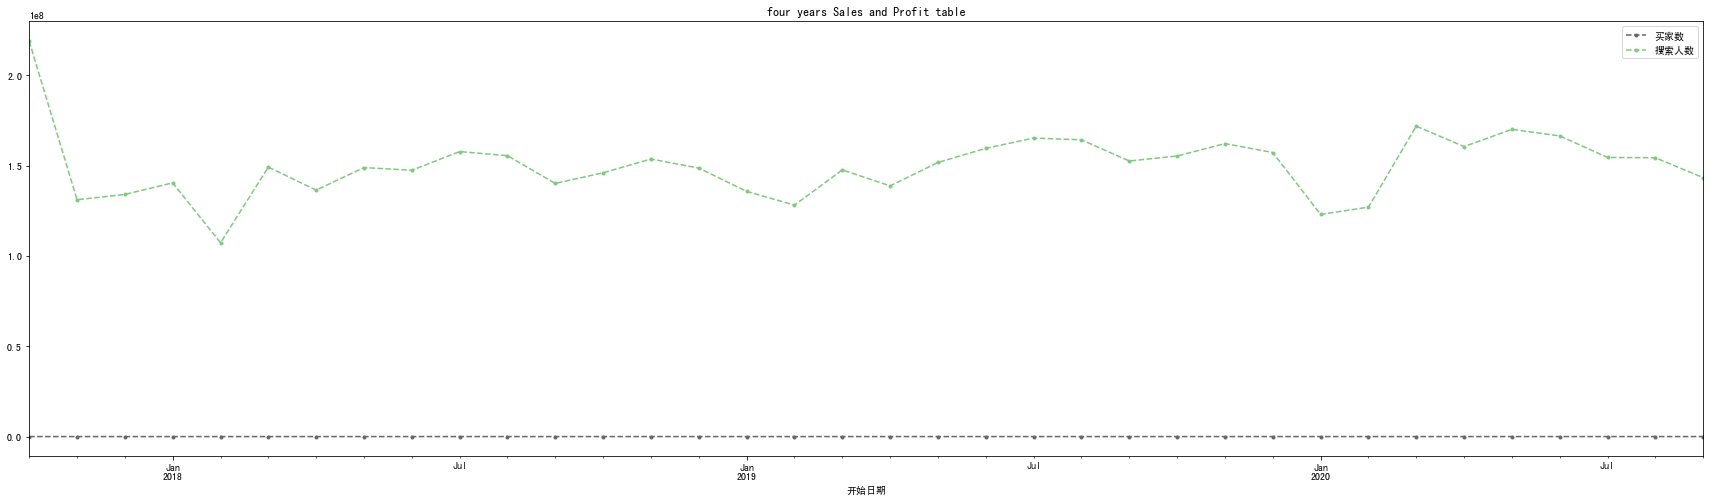

In [58]:
#导入matplotlib进行图表可视化展示
import matplotlib.pyplot as plt
%matplotlib inline
#整体浏览
fig=plt.figure(figsize=(40,10))
result.index
sales_tem=result[['买家数','成交金额','搜索人数']]
first=sales_tem.groupby(sales_tem.index).sum()
first
# .plot(kind='line',style='--g.',colormap='Accent_r',
                                #   figsize=(30,8),title='four years Sales and Profit table',)
# sales_tem.index=sales_tem['开始日期'].astype('object')
first[['买家数','搜索人数']].plot(kind='line',style='--g.',colormap='Accent_r',
                                  figsize=(30,8),title='four years Sales and Profit table',)
# plt.grid()

In [ ]:
data_sale=result.groupby(by=["类目名称"]).sum().sort_values(by='成交金额',ascending=False,na_position='first')
data_sale['单价']=data_sale['成交金额']/data_sale['买家数']
data_sale
# data_sale.loc[:,"买家数":"搜索人数"].head(10) 

In [ ]:
data_sale=result.groupby(by=[result.index.year]).sum() 
data_sale

#可视化展现
# data_sale.plot(kind='bar',colormap = 'RdYlGn_r',alpha=0.5)

In [ ]:
# 2.每月销售额/利润额/销量
data_sale_month=pd.pivot_table(result,index='month',columns='year',values=['买家数','成交金额','搜索人数'],aggfunc='sum')
data_sale_month

#每月销售额/销量/利润额堆叠图
fig,axes = plt.subplots(1,3,figsize = (20,4))
data_sale_month['买家数'].plot.area(colormap = 'Accent_r',stacked=False,ax=axes[0],title='买家数')
data_sale_month['成交金额'].plot.area(colormap = 'Accent_r',stacked=False,ax=axes[1],title='成交金额')
data_sale_month['搜索人数'].plot(colormap = 'Accent_r',ax=axes[2],title='搜索人数')

In [ ]:
# 计算同比增长率
rate=data_sale_month.pct_change()
rate

In [ ]:
    from pyecharts import options as opts
    from pyecharts.charts import Bar
    bar=(
        Bar()
        .add_xaxis(data_sale.index.to_list())
        .add_yaxis("买家数",data_sale["买家数"].to_list())
        .add_yaxis("成交金额",data_sale["成交金额"].to_list())
        .add_yaxis("搜索人数",data_sale["搜索人数"].to_list())
        .set_global_opts(title_opts=opts.TitleOpts(title="商家对比图"))
    )
    bar.render_notebook()

In [ ]:
# 计算同比增长率
rate=data_sale.pct_change()
rate

In [ ]:
    from pyecharts import options as opts
    from pyecharts.charts import Bar
    bar=(
        Bar()
        .add_xaxis(result.index.unique().strftime("%Y-%m-%d").to_list())
        .add_yaxis("手机贴膜",result[result["类目名称"]=="手机贴膜"].买家数.to_list())
        .add_yaxis("手机电池",result[result["类目名称"]=="手机电池"].买家数.to_list())
        .set_global_opts(title_opts=opts.TitleOpts(title="商家对比图"))
    )
    bar.render_notebook()

In [ ]:
import matplotlib 
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
%matplotlib inline
df_merge.groupby(df_merge.index.year)['买家数'].max().plot()
# df_merge.groupby(df_merge.index.month)['买家数'].max().plot()

In [ ]:
import matplotlib
matplotlib.matplotlib_fname()

In [ ]:
import matplotlib
print(matplotlib.get_cachedir())